![](../nci-logo.png)

-------
# Data Access and Manipulation Using iPython Notebooks
## Netcdf Subset Service (NCSS) with Python



### In this notebook:

1. <a href='#part1'>Interactively through THREDDS</a>
2. <a href='#part2'>Using Python and the Siphon package</a>
    - <a href='#part2a'>Extracting spatial subset at single point in time</a>
    - <a href='#part2b'>Extracting a timeseries for a single point in space</a>


   
#### The following material uses Geoscience Australia's Landsat 8 Data Collection which is available under the Creative Commons License 4.0. For more information on the collection and licensing, please [click here](http://geonetwork.nci.org.au/geonetwork/srv/eng/catalog.search#/metadata/f6600_8228_7170_1486). 


---------

<br>

## THREDDS Netcdf Subset Service (NCSS)

The Netcdf Subset Service (NCSS) is one of the data service endpoints available on many of NCI's hosted data collections. NCSS is currently available on NCI's gridded datasets and allows users to request spatial and temporal queries using longitude and latitude values directly. 

<div class="alert alert-info">
<b>NOTE: </b> Part I is a review of how to use the Netcdf Subset Service (NCSS) interactively through THREDDS (included for reference). You might want to skip ahead to Part II on how to make similar requests using Python. 
</div>


<a id='part1'></a> 
### 1. Using Netcdf Subset interactively through THREDDS

#### Begin by navigating to the THREDDS catalog page for the selected data file: 

<img src="./images/ncss1.png">


#### Next, decide whether you want to extract a spatial subset (left/pink arrow), defined by a bounding box, or a single point in space (right/green arrow), defined by a single latitude and longitude:
<img src="./images/ncss2.png">

#### Then proceed by selecting the desired variables, spatial (or lat/lon point) and temporal extents. As selections are made, the NCSS Request URL (near bottom of the page) will update with these parameters. 

<img src="./images/ncss3.png">


#### Click 'Submit' and the request file should begin to download. Alternatively, the NCSS URL can be copied/pasted into a new web browser or used in workflows along with `wget` or `curl` commands. 


**Examples of different NCSS Request URLs:**

>http://dapds00.nci.org.au/thredds/ncss/grid/rs0/datacube/002/LS8_OLI_NBART/-10_-21/LS8_OLI_NBART_3577_-10_-21_2013_v1493805443.nc?req=station&var=swir1&var=swir2&latitude=-19&longitude=122.5&temporal=all&accept=netCDF

>http://dapds00.nci.org.au/thredds/ncss/grid/rs0/datacube/002/LS8_OLI_NBART/-10_-21/LS8_OLI_NBART_3577_-10_-21_2013_v1493805443.nc?var=swir1&var=swir2&var=blue&latitude=-18.8&longitude=123&temporal=all&accept=csv


<br>
<br>
<br>

<a id='part2'></a> 
## 2. Using python package `Siphon`

Siphon is a collection of Python utilities from Unidata technologies for accessing data from THREDDS Data Servers. More information on installing and using Unidata's Siphon can be found: 
https://github.com/Unidata/siphon

 

In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt 
from siphon.catalog import TDSCatalog
from siphon.ncss import NCSS
from datetime import datetime
%matplotlib inline

<a id='part2a'></a> 
### Extracting spatial subset for single point in time

#### Start by copying/pasting the THREDDS catalog URL for the data file. In this example we are using the catalog page for the data file but Siphon can also be used with the higher-levels (dataset and collection) as well. 

#### For example:
The catalog page for the data file should look similar to this page. Copy/paste this URL in the next step below.  

<img src="./images/thredds14.png">

#### Define the URL and use Siphon to list the available service end points
Note: if you change the `.html` to `.xml` you will avoid a UserWarning in the following steps. 

In [2]:
url = 'http://dapds00.nci.org.au/thredds/catalog/rs0/datacube/002/LS8_OLI_NBAR/-10_-11/catalog.html?dataset=LS8_OLI_NBAR/-10_-11/LS8_OLI_NBAR_3577_-10_-11_20160109015321000000.nc'

In [3]:
tds = TDSCatalog(url)
datasets = list(tds.datasets)
endpts = tds.datasets.values()

In [4]:
print "Available data service end points: \n"
for key, value in endpts[0].access_urls.items():
    print key, value

Available data service end points: 

UDDC http://dapds00.nci.org.au/thredds/uddc/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
WCS http://dapds00.nci.org.au/thredds/wcs/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
HTTPServer http://dapds00.nci.org.au/thredds/fileServer/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
WMS http://dapds00.nci.org.au/thredds/wms/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
NCML http://dapds00.nci.org.au/thredds/ncml/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
NetcdfSubset http://dapds00.nci.org.au/thredds/ncss/grid/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
ISO http://dapds00.nci.org.au/thredds/iso/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
OPENDAP http://dapds00.nci.org.au/thredds/dodsC/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3

#### Start by using Siphon to get the NCSS end point

In [5]:
ncss_url = endpts[0].access_urls['NetcdfSubset']

#### We can use Siphon to then display what variables are available in the file

In [6]:
ncss = NCSS(ncss_url)

In [7]:
print "Variables within the file: \n"
print list(ncss.variables)

Variables within the file: 

['band_6', 'band_7', 'band_4', 'band_5', 'band_2', 'band_3', 'band_1']


#### We can define a little function that will be used to request a spatial subset for a single timestep

In [8]:
def get_all_space_single_time(ncss_url, bbox, time):
    """
    This function will setup the NCSS query and return the requested subset for a
    given bounding box (north, south, east, west) and point in time. 
    
    Note: the 'time' query here is for a single point in time. The same method can 
    be use to request all of time (i.e., query.all_times()) or a time range 
    (i.e., query.time_range(start, end)). See the Siphon Documentation for complete 
    list of options.
    """
    
    ncss = NCSS(ncss_url)
    query = ncss.query()
    query.lonlat_box(north=bbox[0],south=bbox[1],east=bbox[3],west=bbox[2])
    query.variables('swir1')
    query.time(time)
    
    
    data = ncss.get_data(query)
    
    return data

#### Now let's use the above function to make a request

#### We will need to define a bounding box and a point in time

In [9]:
bbox = (-18.4, -19.3, 122.4, 123.4)

time = datetime.strptime('2013-12-11T01:51:06.153Z', '%Y-%m-%dT%H:%M:%S.%fZ')

data = get_all_space_single_time(ncss_url, bbox, time)

#### The output (`data`) is in the netCDF format. We can view and extract data in the same manner:

In [10]:
print "Variables: ", data.variables.keys()

Variables:  [u'band_2', u'time', u'y', u'x', u'crs']


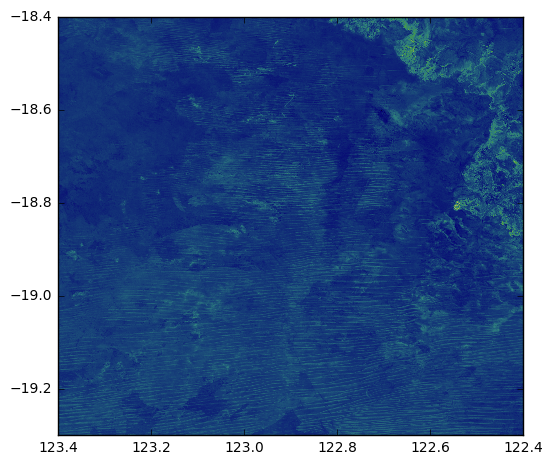

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(data['band_2'][0,:,:], extent=[bbox[3], bbox[2], bbox[1], bbox[0]], cmap='gist_earth')

<br> 
<br>

<a id='part2b'></a> 
### Extracting timeseries for single point in space 
This example will demonstrate how Siphon can be used to help generate the NCSS request URL and then download locally to be used in other workflows. 

#### Start again by using Siphon to get the NCSS end point

In [12]:
ncss_url = endpts[0].access_urls['NetcdfSubset']

#### We can again use Siphon to then display what variables are available in the file

In [13]:
ncss = NCSS(ncss_url)

In [14]:
print "Variables within the file: \n"
print list(ncss.variables)

Variables within the file: 

['band_6', 'band_7', 'band_4', 'band_5', 'band_2', 'band_3', 'band_1']


#### Let's form a query request for a particular (lat, lon) location for the full timeseries

In [15]:
lat, lon = -18.8, 123

#### Can again use the `query` constructor from Siphon to easily form the correct query syntax
In this example we will request several bands with the output format as CSV (though 'netCDF', which will return a netCDF3 file, is also an option here). 

In [16]:
query = ncss.query()
query.lonlat_point(lon, lat)
query.variables('band_4','band_6', 'band_7')
query.all_times()
query.accept('csv')

var=band_6&var=band_7&var=band_4&temporal=all&latitude=-18.8&longitude=123&accept=csv

#### Construct the URL for the query and perform request
There are two parts to forming the request, the base NCSS URL and the query we just constructed above. 

In [17]:
print "NCSS Base URL: ", ncss_url
print "Query: ", query

NCSS Base URL:  http://dapds00.nci.org.au/thredds/ncss/grid/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc
Query:  var=band_6&var=band_7&var=band_4&temporal=all&latitude=-18.8&longitude=123&accept=csv


#### We combine these along with a '?' between the two and then use the `urllib2` library to make the request

In [18]:
query_url = ncss_url+'?'+str(query)
print query_url

http://dapds00.nci.org.au/thredds/ncss/grid/rs0/tiles/EPSG3577/LS8_OLI_TIRS_NBAR/LS8_OLI_TIRS_NBAR_3577_-10_-21_2013.nc?var=band_6&var=band_7&var=band_4&temporal=all&latitude=-18.8&longitude=123&accept=csv


In [19]:
import urllib2

response = urllib2.urlopen(query_url)

#### Write output to file

In [20]:
with open('output.csv', 'w') as f:
    f.write(response.read())

<br></br>

### Can open, view, and plot the timeseries using Pandas 
Though there are many different options, this is just one example. 

In [21]:
import pandas as pd

#### Create a data frame object from the CSV file

In [22]:
df = pd.DataFrame.from_csv('output.csv', header=0, sep=',')
df.head()

,"latitude[unit=""degrees_north""]","longitude[unit=""degrees_east""]","band_6[unit=""1""]","band_7[unit=""1""]","band_4[unit=""1""]"
time,,,,,
2013-03-26 01:44:16.825,-18.8,123.0,-999.0,-999.0,-999.0
2013-03-26 01:44:40.664,-18.8,123.0,-999.0,-999.0,-999.0
2013-04-15 01:51:20.207,-18.8,123.0,3784.0,2930.0,1879.0
2013-04-15 01:51:44.145,-18.8,123.0,-999.0,-999.0,-999.0
2013-04-24 01:45:06.111,-18.8,123.0,-999.0,-999.0,-999.0


#### For easier plotting, remove the timesteps with no information

In [23]:
df = df[df != -999].dropna()
df.head()

,"latitude[unit=""degrees_north""]","longitude[unit=""degrees_east""]","band_6[unit=""1""]","band_7[unit=""1""]","band_4[unit=""1""]"
time,,,,,
2013-04-15 01:51:20.207,-18.8,123.0,3784.0,2930.0,1879.0
2013-06-18 01:51:27.541,-18.8,123.0,3369.0,2650.0,1694.0
2013-07-04 01:51:29.589,-18.8,123.0,3346.0,2573.0,1530.0
2013-07-20 01:51:28.362,-18.8,123.0,3332.0,2463.0,1524.0
2013-08-05 01:51:31.463,-18.8,123.0,3346.0,2543.0,1566.0


#### Plot the columns of interest

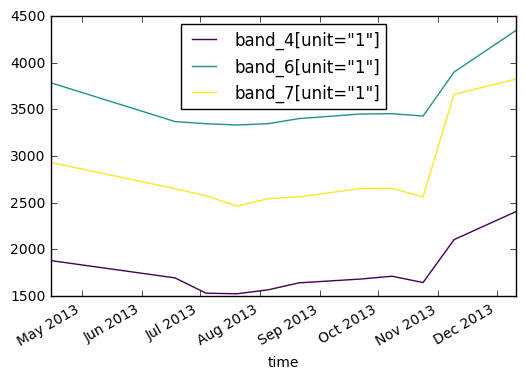

In [24]:
df.loc[:,['band_4[unit="1"]', 'band_6[unit="1"]', 'band_7[unit="1"]']].plot(kind='line', colormap='viridis')